<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Cargar-datos" data-toc-modified-id="Cargar-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar datos</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Indice-temporal" data-toc-modified-id="Indice-temporal-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Indice temporal</a></span></li><li><span><a href="#Columnas" data-toc-modified-id="Columnas-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Columnas</a></span></li><li><span><a href="#Funcionalidad" data-toc-modified-id="Funcionalidad-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Funcionalidad</a></span></li></ul></li></ul></li><li><span><a href="#Análisis" data-toc-modified-id="Análisis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis</a></span><ul class="toc-item"><li><span><a href="#Drawdown" data-toc-modified-id="Drawdown-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drawdown</a></span></li><li><span><a href="#VaR" data-toc-modified-id="VaR-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>VaR</a></span></li><li><span><a href="#Estadísticos" data-toc-modified-id="Estadísticos-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Estadísticos</a></span></li></ul></li><li><span><a href="#Efficient-Frontier" data-toc-modified-id="Efficient-Frontier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Efficient Frontier</a></span><ul class="toc-item"><li><span><a href="#Conjunto-de-rendimientos-esperados." data-toc-modified-id="Conjunto-de-rendimientos-esperados.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conjunto de rendimientos esperados.</a></span></li><li><span><a href="#Media-en-la-matriz-de-covarianza." data-toc-modified-id="Media-en-la-matriz-de-covarianza.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Media en la matriz de covarianza.</a></span></li></ul></li></ul></div>

## Librerías

In [1]:
import pandas as pd
from modules import edhec_risk_kit as erk
import plotly 

# Modo desarrollo del módulo edhec_risk_kit
%matplotlib inline
%load_ext autoreload
%autoreload 2
plotly.offline.init_notebook_mode(connected = True)



## Cargar datos

In [2]:
df_ind = pd.read_csv('../data/ind30_m_vw_rets.csv',
                     header=0,
                     index_col=0,
                     parse_dates=True)/100
df_ind.head(10)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
192612,-0.0051,-0.0409,0.0255,0.0217,0.0053,0.0256,0.0060,0.0011,0.0537,0.0643,...,0.0199,0.0621,0.0724,-0.0463,0.0359,0.0965,0.0057,0.0151,0.0268,-0.0234
192701,-0.0084,0.0057,-0.0035,0.0187,0.0967,0.0408,-0.0106,0.0505,0.0023,-0.0150,...,0.0188,0.0208,-0.0145,-0.0260,0.0144,-0.1793,-0.0270,0.0152,-0.0238,-0.0396
192702,0.0442,0.1283,0.0149,0.0164,0.0141,0.0457,0.0277,0.0171,0.0969,0.0774,...,0.0397,0.0890,0.0485,0.0546,0.0518,0.0349,0.0347,0.0686,0.0297,0.0028
192703,0.0209,-0.1356,0.0551,0.0102,-0.0028,-0.0008,0.0090,0.0101,0.0607,-0.0539,...,0.0556,-0.0780,0.0429,-0.0967,0.0106,-0.2047,-0.0030,-0.0242,0.0136,0.0218
192704,0.0272,0.0285,0.0401,-0.0377,-0.0096,0.0144,0.0595,0.0274,0.0295,0.0054,...,-0.0213,0.0344,0.0310,0.0493,0.0074,-0.1075,0.0438,0.0656,0.0289,0.0527


In [3]:
df_ind.shape

(1110, 30)

### Data preparation

#### Indice temporal

In [4]:
df_ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [5]:
# Convertir indice a formato fecha
df_ind.index = pd.to_datetime(df_ind.index, format='%Y-%m').to_period('M')

In [6]:
df_ind.index

PeriodIndex(['1970-01', '1970-01', '1970-01', '1970-01', '1970-01', '1970-01',
             '1970-01', '1970-01', '1970-01', '1970-01',
             ...
             '1970-01', '1970-01', '1970-01', '1970-01', '1970-01', '1970-01',
             '1970-01', '1970-01', '1970-01', '1970-01'],
            dtype='period[M]', length=1110, freq='M')

In [7]:
df_ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1970-01,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1970-01,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1970-01,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1970-01,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1970-01,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


#### Columnas

Obtener columnas sin espacio

In [8]:
df_ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [9]:
df_ind.columns = df_ind.columns.str.strip()

In [10]:
df_ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

#### Funcionalidad

In [11]:
def get_ind_returns(filename):
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly
    Returns.
    
    Args:
    -----
    filename [{str}] -- Directorio del fichero csv.
    
    
    Returns:
    -----
    df_ind [{pandas.DataFrame}] -- DataFrame cargado con el csv con el formato
                                   adecuado.
    """
    df_ind = pd.read_csv(filename,
                         header=0,
                         index_col=0,
                         parse_dates=True)/100
    
    # Convertir indice a formato fecha
    df_ind.index = pd.to_datetime(df_ind.index, format='%Y%m').to_period('M')

    # Formatear nombre de columnas
    df_ind.columns = df_ind.columns.str.strip()
    
    return df_ind

In [12]:
df_ind = erk.get_ind_returns(filename='../data/ind30_m_vw_rets.csv')
df_ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [13]:
df_ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

## Análisis

### Drawdown

In [14]:
food_drawdown = erk.drawdown(df_ind['Food'], capital_inicial=1000)
erk.plot_drawdowns(food_drawdown, title='Food Drawdown')

### VaR 

In [15]:
def var_analysis(returns : pd.DataFrame, level):
    """
    
    
    
    Args:
    ------
    returns [{pandas.DataFrame}] -- DataFrame de retornos de distintos activos
    level [{float}] -- Nivel de VaR
    
    Returns:
    ------
    
    """
    df_result = pd.DataFrame(index=returns.columns)
    
    # Var Historic
    var_historic = erk.var_historic(returns, level=level).sort_values()
    df_var_historic = pd.DataFrame(var_historic)
    df_var_historic.columns= ['Historic']
    df_result = df_result.join(df_var_historic)
    
    # VaR Gaussian
    var_gaussian = erk.var_gaussian(returns, level=level).sort_values()
    df_var_gaussian = pd.DataFrame(var_gaussian)
    df_var_gaussian.columns= ['Gaussian']
    df_result = df_result.join(df_var_gaussian)
    
    # VaR Cornish-Fisher
    var_cornish_fisher = erk.var_cornish_fisher(returns, level=5).sort_values()
    df_var_cornish_fisher = pd.DataFrame(var_cornish_fisher)
    df_var_cornish_fisher.columns= ['Cornish-Fisher']
    df_result = df_result.join(df_var_cornish_fisher)
    
    
    # Visualización
    layout = go.Layout(
    autosize=False,
    width=1150,
    height=550,

    xaxis= go.layout.XAxis(linecolor = 'black',
                           linewidth = 1,
                           mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                           linewidth = 1,
                           mirror = True),

    margin=go.layout.Margin(l=50,
                            r=50,
                            b=100,
                            t=100,
                            pad = 4))
    
    fig = go.Figure(data=[
        go.Bar(name='Historic', x=df_var.index, y=df_var['Historic']),
        go.Bar(name='Gaussian', x=df_var.index, y=df_var['Gaussian']),
        go.Bar(name='Cornish-Fisher', x=df_var.index, y=df_var['Cornish-Fisher'])
    ],
                   layout=layout)
    
    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.show()
    
    return df_result

In [16]:
df_var = erk.var_analysis(df_ind, level=5)

### Estadísticos

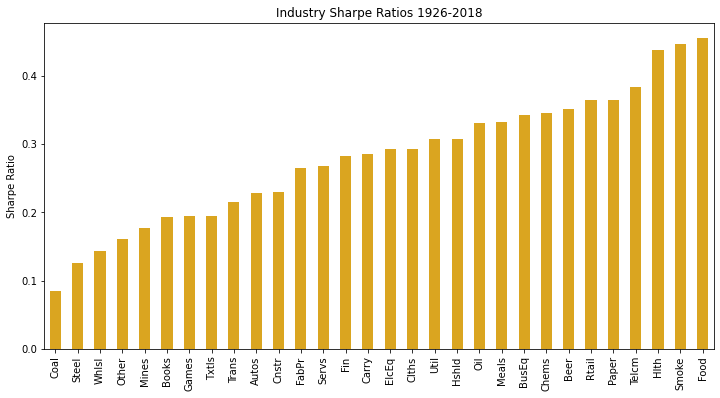

In [17]:
rfr = 0.03 # risk free rate
ppy = 12   # periods per year

df_sr = erk.sharpe_ratio(df_ind, risk_free_rate=rfr, periods_per_year=ppy).sort_values()
_ = df_sr.plot.bar(title='Industry Sharpe Ratios 1926-2018', color='goldenrod', figsize=(12,6), ylabel='Sharpe Ratio')

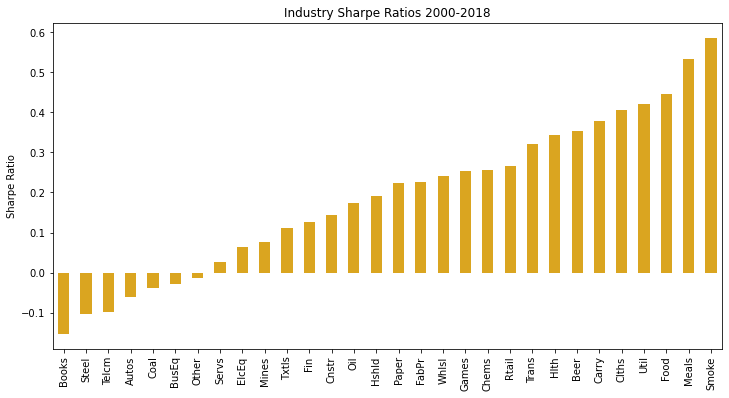

In [18]:
rfr = 0.03 # risk free rate
ppy = 12   # periods per year

df_sr = erk.sharpe_ratio(df_ind["2000":], risk_free_rate=rfr, periods_per_year=ppy).sort_values()
_ = df_sr.plot.bar(title='Industry Sharpe Ratios 2000-2018', color='goldenrod', figsize=(12,6), ylabel='Sharpe Ratio')

## Efficient Frontier

Parámetros necesarios para calcular la frontera eficiente (Efficient Frontier):


Una vez que se calculan las correlaciones y volatilidades (información incluida en la matriz de covarianza) y se disponen de los rendimientos esperados es posible calcular la frontera eficiente

### Conjunto de rendimientos esperados.

Dado que los retornos esperados no son conocidos, es decir, no se conoce cuales son los rendimientos que se van a obtener durante el próximo período de inversión, se toma una muestra de en la cuál se conocen los rendimientos que se han obtenido. Por el momento, la idea es pensar en esto como un ejercicio sobre la muestra, es decir, calcular la frontera eficiente sobre un conjunto conocido de datos pero no coo un ejercicio de predicción. En otras palabras, se trata de obtener cuál fue la frontera eficiente durante un período determinado conocido. 

Una forma de hacerlo es estudiar el período de 1995-2000 y calcular cuáles fueron los rendimientos reales que se obtuvieron durante dicho período. 

### Media en la matriz de covarianza.

Una vez conocidos los rendimientos esperados, el siguiente paso es generar la matriz de covarianza. 

La matriz de covarianza es una matriz cuadrad  con tantas columnas y filas como número de activos se tienen. Es simétrica sobre la diagonal porque la covarianza entre, por ejemplo, el activo A y el activo B es la misma que la covarianza entre el activo B y el activo A, es decir, $cov_{(A,B)=cov_{(B, A)}}$. Además, la diagonal, corresponde con el valor de la varianza del propio activo. 

Recibe el nombre de matriz de covarianza de varianza porque cada uno de los valores es técnicamente una covarianza entre dos activos diferentes, y entonces la diagonal no es más que la varianza de los propios activos.

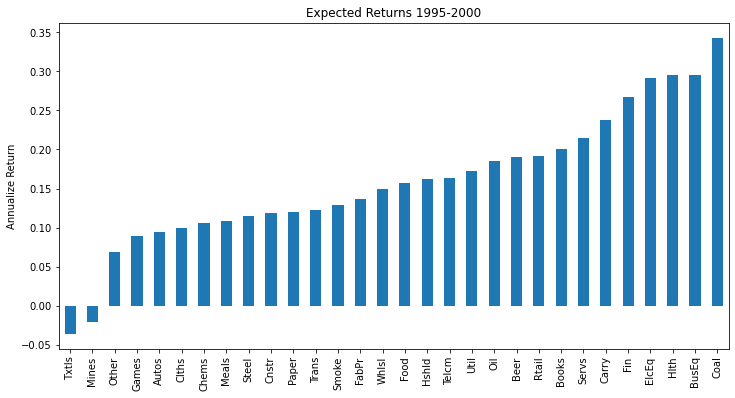

In [19]:
# Calcular rendimientos esperados sobre una muestra en un período de tiempo conocido.
er = erk.annualize_rets(df_ind['1995':'2000'], periods_per_year=12).sort_values()
_ = er.plot.bar(title='Expected Returns 1995-2000', ylabel='Annualize Return', figsize=(12,6))

In [20]:
pd.options.display.max_columns=30
pd.options.display.max_rows=30
cov_er = df_ind['1995':'2000'].cov()

In [21]:
cov_er.shape

(30, 30)

In [22]:
cov_er

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,0.001282,0.000027,0.000613,0.001146,0.000547,0.001419,0.000829,0.000034,0.000933,0.000858,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,0.001945,0.000131,0.000666,0.001107,0.001296,0.001804,0.000272,0.001261,0.000672,0.000631,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,0.001181,0.000167,0.000668,-0.000013,0.000223,0.001485,0.001311,-0.000544,0.000849,0.001118,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,0.001723,0.002670,0.002498,0.001980,0.001994,0.001644,0.001600,0.001557,0.000968,0.000023,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,0.001531,0.001797,0.001704,0.002084,0.001550,0.001301,0.001281,0.002051,0.000868,0.000455,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,0.001770,0.001050,0.001125,0.001426,0.001466,0.001704,0.000598,0.001787,0.000541,0.000350,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,0.002486,0.001702,0.002430,0.002239,0.002521,0.002873,0.002467,0.002433,0.001646,0.000646,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,0.001217,0.000836,0.000768,0.001108,0.000851,0.000755,0.001103,0.001549,0.000523,0.000543,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,0.001829,0.002327,0.002273,0.001560,0.001882,0.002374,0.002345,0.001910,0.001843,0.000545,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,0.001648,0.001321,0.001576,0.001102,0.001811,0.001842,0.001274,0.000652,0.001104,0.000777,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668
